In [2]:
import pandas as pd
import sklearn.ensemble as sk
# from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
# main reference: https://www.youtube.com/watch?v=Af_4MzL2ick

In [7]:
df = pd.read_csv("music-listening-data-with-metadata.csv")

In [8]:
df.head()

,Unnamed: 0,attention-class,class-score,track-title,artist,text-reading,bpm,lyric-count
0,0,DISTRACTED,0.866439,Love is Heartbreak,Cousin Tony's Brand New Firebird,483,135.0,178.0
1,1,DISTRACTED,0.876667,Love is Heartbreak,Cousin Tony's Brand New Firebird,407,135.0,178.0
2,2,FOCUSED,0.975039,Love is Heartbreak,Cousin Tony's Brand New Firebird,107,135.0,178.0
3,3,FOCUSED,0.961814,Love is Heartbreak,Cousin Tony's Brand New Firebird,196,135.0,178.0
4,4,FOCUSED,0.962477,Love is Heartbreak,Cousin Tony's Brand New Firebird,195,135.0,178.0


In [9]:
# Independent variable
X = df[["text-reading", "bpm", "lyric-count"]]

In [10]:
# Dependent variable
y = df["attention-class"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
clf = sk.RandomForestClassifier(n_estimators=100)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [14]:
pd.crosstab(y_test,y_pred)

col_0,DISTRACTED,FOCUSED
attention-class,,
DISTRACTED,105,24
FOCUSED,37,59


In [15]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

  DISTRACTED       0.74      0.81      0.77       129
     FOCUSED       0.71      0.61      0.66        96

    accuracy                           0.73       225
   macro avg       0.73      0.71      0.72       225
weighted avg       0.73      0.73      0.73       225



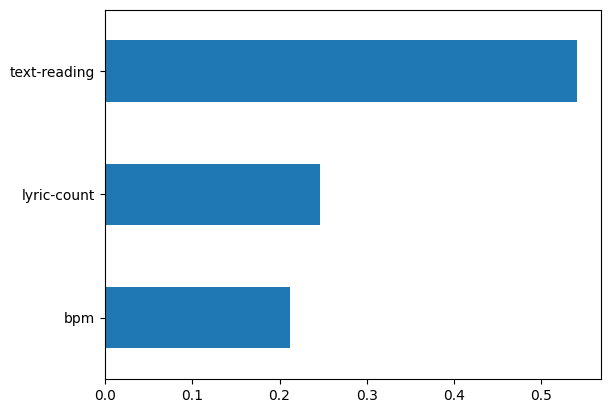

In [16]:
model_ranks=pd.Series(clf.feature_importances_,index=x_train.columns,name="Importance").sort_values(ascending=True)
ax=model_ranks.plot(kind="barh")

In [17]:
clf.feature_importances_

array([0.5416286 , 0.21180063, 0.24657078])

# Train on BPM and Lyrics Only

In [18]:
X = df[["bpm", "lyric-count"]]
y = df["attention-class"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = sk.RandomForestClassifier(n_estimators=100)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

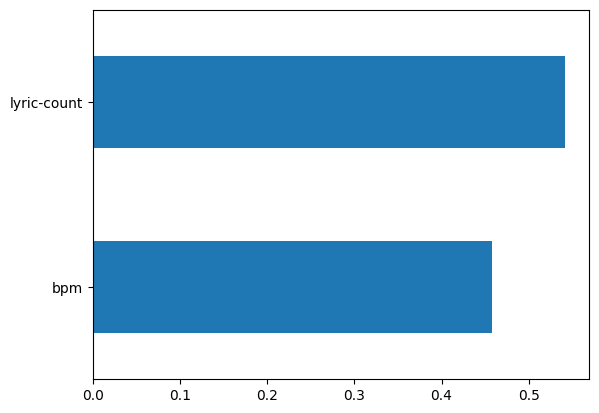

In [19]:
model_ranks = pd.Series(
    clf.feature_importances_, index=x_train.columns, name="Importance"
).sort_values(ascending=True)
ax = model_ranks.plot(kind="barh")

In [20]:
clf.feature_importances_

array([0.45775001, 0.54224999])

array([0.45775001, 0.54224999])

BPM weighting = 0.45775001

Lyric Weighting = 0.54224999

# Create Plots

In [31]:
df = pd.read_csv("music-listening-data-with-metadata.csv")

test_df = df
test_df.head()

# https://www.geeksforgeeks.org/normalize-a-column-in-pandas/
test_df["bpm"] = test_df["bpm"] / test_df["bpm"].abs().max()
test_df["lyric-count"] = test_df["lyric-count"] / test_df["lyric-count"].abs().max()
test_df["text-reading"] = test_df["text-reading"] / test_df["text-reading"].abs().max()

attention = test_df["attention-class"].replace({"DISTRACTED": 0, "FOCUSED": 1})

test_df["attention-class"] = attention

/var/folders/s6/c5_9wx9s4_vgqmsz5stbpgt40000gn/T/ipykernel_1645/2622951220.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  attention = test_df["attention-class"].replace({"DISTRACTED": 0, "FOCUSED": 1})


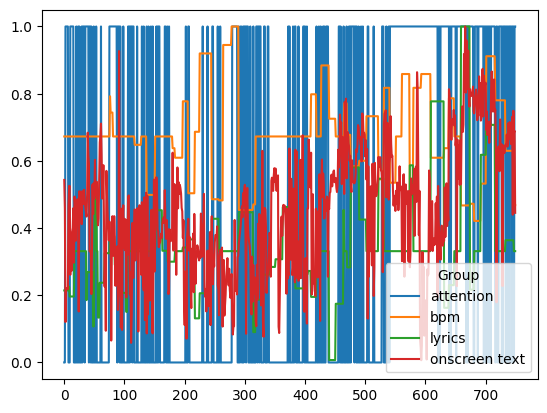

In [33]:
import matplotlib.pyplot as plt

# plot each series
plt.plot(df["attention-class"], label="attention")
plt.plot(df["bpm"], label="bpm")
plt.plot(df["lyric-count"], label="lyrics")
plt.plot(df["text-reading"], label="onscreen text")


plt.legend(title="Group")
# display plot
plt.show()

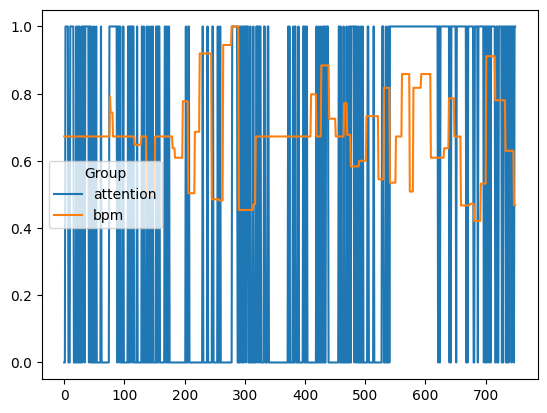

In [ ]:
import matplotlib.pyplot as plt

# plot each series
plt.plot(df["attention-class"], label="attention")
plt.plot(df["bpm"], label="bpm")

plt.legend(title="Group")
# display plot
plt.show()

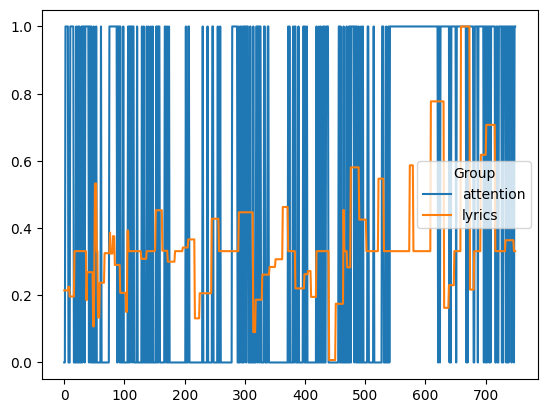

In [36]:
import matplotlib.pyplot as plt

# plot each series
plt.plot(df["attention-class"], label="attention")
plt.plot(df["lyric-count"], label="lyrics")
# plt.plot(df["text-reading"], label="onscreen text")


plt.legend(title="Group")
# display plot
plt.show()